In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [5]:
df=df[df['sex']!='.']
df.shape


(343, 7)

In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

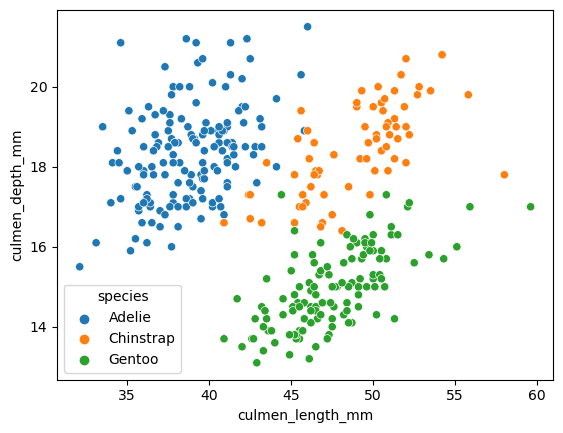

In [8]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')

In [9]:
df=df.dropna()
df.shape

(333, 7)

In [10]:
df1=df.drop('species',axis=1)

In [11]:
df1.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [12]:
x=pd.get_dummies(df1,drop_first=True)

In [13]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   island_Dream       333 non-null    uint8  
 5   island_Torgersen   333 non-null    uint8  
 6   sex_MALE           333 non-null    uint8  
dtypes: float64(4), uint8(3)
memory usage: 14.0 KB


In [15]:
y=df['species']

In [16]:
y.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [17]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# KNN ALGORITHM

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)


train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

model.score(x_train,y_train)

model.score(x_test,y_test)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.8021709633649932

In [20]:
model.score(x_train,y_train)

0.8283261802575107

In [21]:
model.score(x_test,y_test)

0.79

In [22]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.8021709633649932

In [23]:
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 1, 'p': 1}

In [24]:
model=KNeighborsClassifier(n_neighbors=1,p=1)
model.fit(x_train,y_train)


train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

model.score(x_train,y_train)

model.score(x_test,y_test)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.8562641338760741

In [25]:
predicted_data_0={'culmen_length_mm':39.1,'culmen_depth_mm':18.7,'flipper_length_mm':181.0,'body_mass_g':3750.0,'island_Dream':0,'island_Torgersen':1,'sex_MALE':1}

test_data_0=pd.DataFrame(predicted_data_0,index=[0])
test_data_0

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1


In [26]:
model.predict(test_data_0)

array(['Adelie'], dtype=object)

In [31]:
model.score(x_train,y_train)

1.0

In [32]:
model.score(x_test,y_test)

0.85

In [33]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.8562641338760741

| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 1.0         |       0.85 |   0.856   |

# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=0)
dt_default.fit(x_train,y_train)

train_pred=dt_default.predict(x_train)
test_pred=dt_default.predict(x_test)

In [36]:
dt_default.score(x_train,y_train)


1.0

In [38]:
dt_default.score(x_test,y_test)

0.98

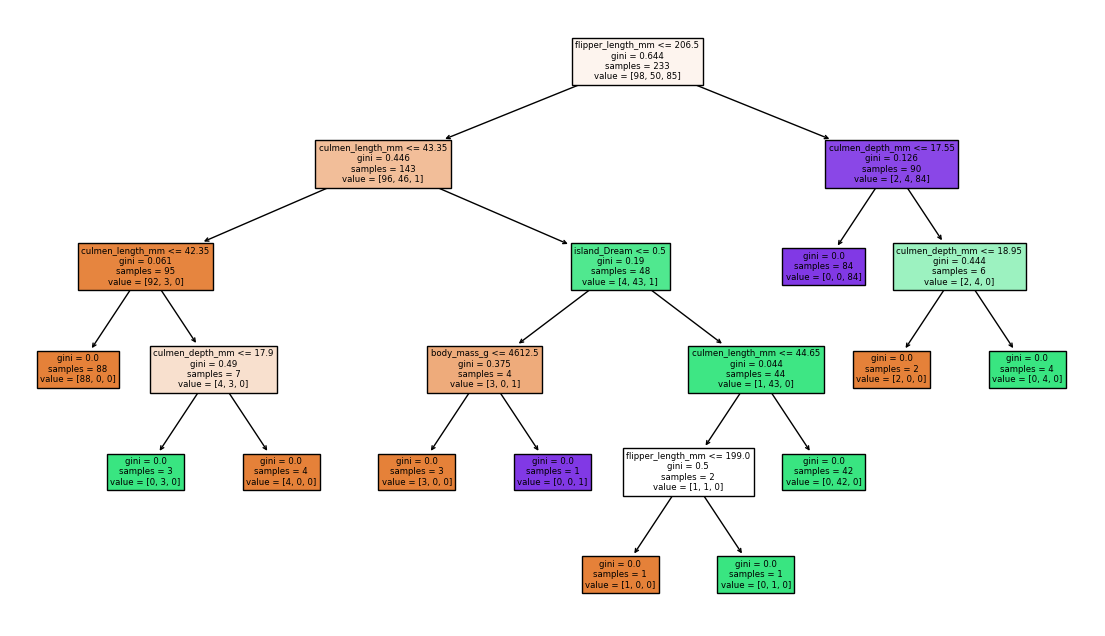

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_default,filled=True,feature_names=x.columns)
plt.show()

In [40]:
dt_default.feature_importances_

array([0.34756206, 0.09868076, 0.50596782, 0.00999714, 0.03779222,
       0.        , 0.        ])

In [41]:
pd.DataFrame(index=x.columns,data=dt_default.feature_importances_)

,0
culmen_length_mm,0.347562
culmen_depth_mm,0.098681
flipper_length_mm,0.505968
body_mass_g,0.009997
island_Dream,0.037792
island_Torgersen,0.000000
sex_MALE,0.000000


In [42]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [43]:
x=x.drop(['island_Torgersen','sex_MALE'],axis=1)

In [44]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [45]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=0)

param_grid={'criterion':['gini','entropy'],
           'max_depth':[1,2,3,4]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
dt_hp=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_hp.fit(x_train,y_train)

train_pred=dt_hp.predict(x_train)

test_pred=dt_hp.predict(x_test)

dt_hp.score(x_train,y_train)


0.9871244635193133

In [48]:
dt_hp.score(x_test,y_test)

0.95

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_hp,x,y,cv=5)
scores.mean()

0.9608774310266849

| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 1.0         |       0.85 |   0.856   |
| DECISION TREE        | 0.98        | 0.95       | 0.960     |

In [51]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [52]:
train_pred=LR_model.predict(x_train)
test_pred=LR_model.predict(x_test)

In [53]:
print('Train accuracy:',LR_model.score(x_train,y_train))
print('Test accuracy:',LR_model.score(x_test,y_test))


from sklearn.model_selection import cross_val_score
scores=cross_val_score(LR_model,x,y,cv=5)
print('Cv score:',scores.mean())

Train accuracy: 0.9957081545064378
Test accuracy: 0.97
Cv score: 0.9820443238353687


| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 1.0         |       0.85 |   0.856   |
| DECISION TREE        | 0.98        | 0.95       | 0.960     |
| LOGISTIC REGRESSION  | 0.99        | 0.97       | 0.98      |

## BEST MODEL IS LOGISTIC REGRESSION